# Feature Selecction/ Dimension Reduction Using LassoCV

In [ ]:
#import all the required package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from itertools import chain, combinations
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV

from sklearn.preprocessing import StandardScaler

  
import warnings
warnings.filterwarnings("ignore")

# Read the Data

In [3]:
df = pd.read_csv("../Data/Mice Data/data_after_mice.csv",header=0,encoding='utf-8')

In [4]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,emp_length,annual_inc,issue_month,issue_year,dti,...,loan_status_Does_not_meet_the_credit_policy_Status_Charged_Off,loan_status_Does_not_meet_the_credit_policy_Status_Fully_Paid,loan_status_Fully_Paid,loan_status_In_Grace_Period,loan_status_Issued,loan_status_Late_16_30_days,loan_status_Late_31_120_days,pymnt_plan_y,initial_list_status_w,int_rate
0,0.119293,0.119293,0.118696,0.000859,0.003886,0.000239,0.572605,0.000286,0.047980,0.000660,...,0,0,1,0,0,0,0,0,0,10.65
1,0.067323,0.067323,0.067323,0.001616,0.001611,0.000000,0.807871,0.000323,0.054154,0.000027,...,0,0,0,0,0,0,0,0,0,15.27
2,0.152472,0.152472,0.152472,0.002287,0.005357,0.000635,0.778372,0.000762,0.127759,0.000554,...,0,0,1,0,0,0,0,0,0,15.96
3,0.155753,0.155753,0.155753,0.000561,0.005285,0.000156,0.766305,0.000187,0.031322,0.000312,...,0,0,1,0,0,0,0,0,0,13.49
4,0.032231,0.032231,0.032231,0.000645,0.000728,0.000011,0.859494,0.000129,0.021606,0.000193,...,0,0,0,0,0,0,0,0,0,12.69
5,0.099349,0.099349,0.099349,0.000715,0.003109,0.000060,0.715312,0.000238,0.039958,0.000223,...,0,0,1,0,0,0,0,0,0,7.90
6,0.106246,0.106246,0.106246,0.000911,0.002581,0.000121,0.713430,0.000182,0.030523,0.000357,...,0,0,0,0,0,0,0,0,0,15.96
7,0.052606,0.052606,0.052606,0.000631,0.001919,0.000158,0.841692,0.000210,0.035263,0.000094,...,0,0,1,0,0,0,0,0,0,18.64
8,0.111898,0.111898,0.111898,0.001199,0.003045,0.000080,0.799273,0.000240,0.040183,0.000111,...,0,0,0,0,0,0,0,0,0,21.28
9,0.161685,0.161685,0.160933,0.001805,0.003653,0.000000,0.451215,0.000361,0.060493,0.000544,...,0,0,0,0,0,0,0,0,0,12.69


In [5]:
#split the data in train ,test , cv
size = df.shape[0]

rs = 1

Train, Test = train_test_split(df, test_size= 0.2, random_state= rs)


CV, Test = train_test_split(Test, test_size=0.5, random_state = rs)

print(Train.shape, CV.shape, Test.shape)

(709820, 92) (88727, 92) (88728, 92)


In [6]:
#split the data in dependent and independent variable
Train_y = np.array(Train["int_rate"])
CV_y = np.array(CV["int_rate"])
Test_y = np.array(Test["int_rate"])
Train_x = Train.drop(["int_rate"], axis = 1)
CV_x = CV.drop(["int_rate"], axis = 1)
Test_x = Test.drop(["int_rate"], axis = 1)

RMSE of Lasso:  0.6796729352761176


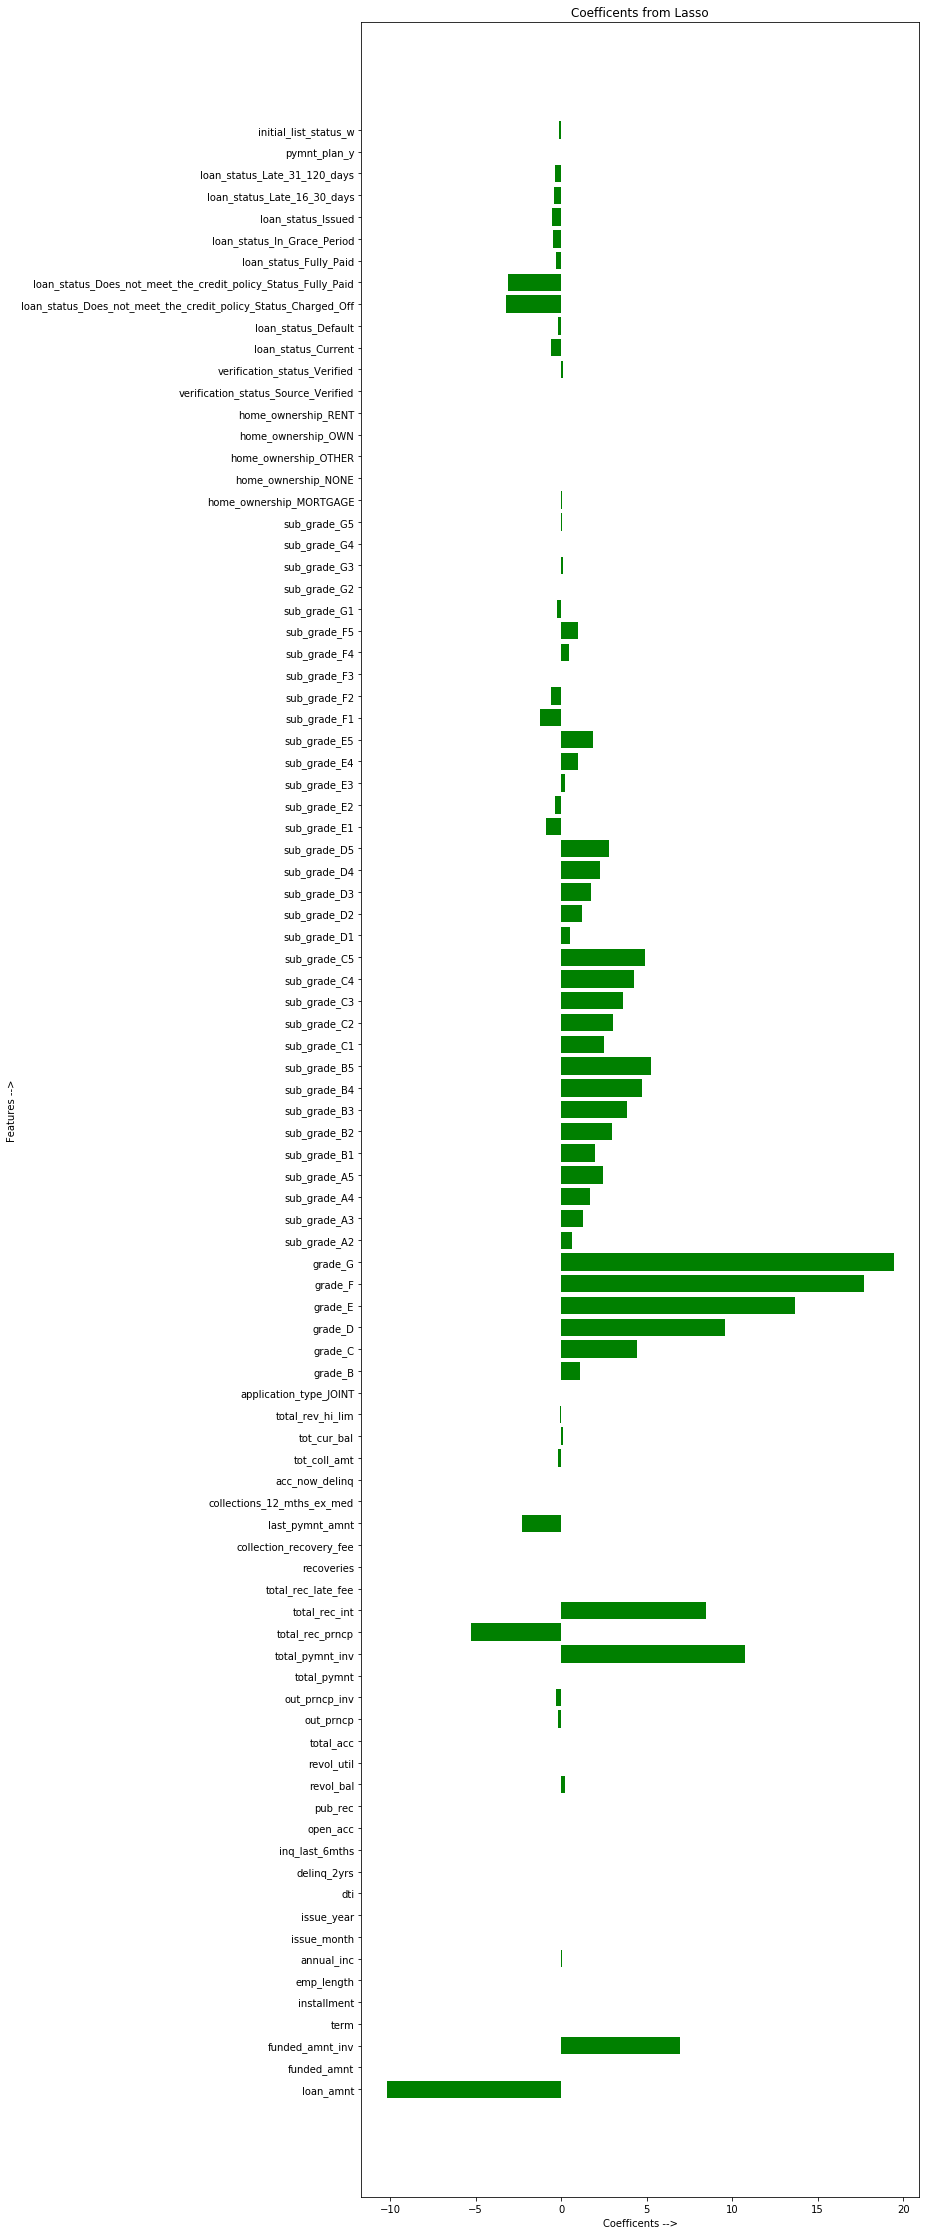

In [7]:
#perform lassocv for variable selection
modellasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0001, 10, 1000]).fit(Train_x, Train_y)
lassopred = modellasso.predict(CV_x)
print("RMSE of Lasso: ", np.sqrt(mean_squared_error(lassopred, CV_y)))

coeff = modellasso.coef_

x = list(Train_x)
x_pos = [i for i, _ in enumerate(x)]


plt.figure(figsize = (10,40))
plt.barh(x_pos, coeff, color='green')
plt.ylabel("Features -->")
plt.xlabel("Coefficents -->")
plt.title("Coefficents from Lasso")
plt.yticks(x_pos, x)

plt.show()

